# [WS]Boston 주택 가격 선형 모델 만들기
Boston 주택 가격 데이타를 분석해서 가장 좋은 결과의 선형 모델을 만든다.

## 보스턴 주택 가격 데이타 셑 로딩
* 필용 라이브러리 import
* `load_boston` 호출

In [41]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns

from sklearn.datasets import  load_boston

boston = load_boston()

## Pandas DataFrame 생성하기
* `df`
* 상위 5개 미리 보기

In [42]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Target Data Column DF에 추가하기
* target column : 'Price'
* 상위 5개 미리보기

In [44]:
df['Price'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 결측지 확인
* 컬럼 당 NaN이 있는 건수 확인

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

## Target 데이타의 분포 확인
* seaborn의 distplot으로 'Price'의 분포 확인

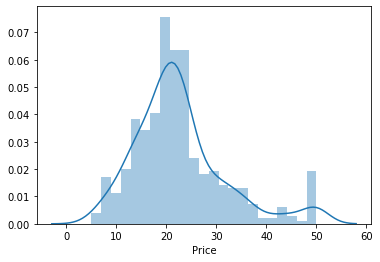

## 각 변수들 간의 상관 관계 분석
* `df.corr()` 함수로 모든 변수들 간의 상관 관계 분석
* seaborn의 heatmap으로 상관 관계 표시

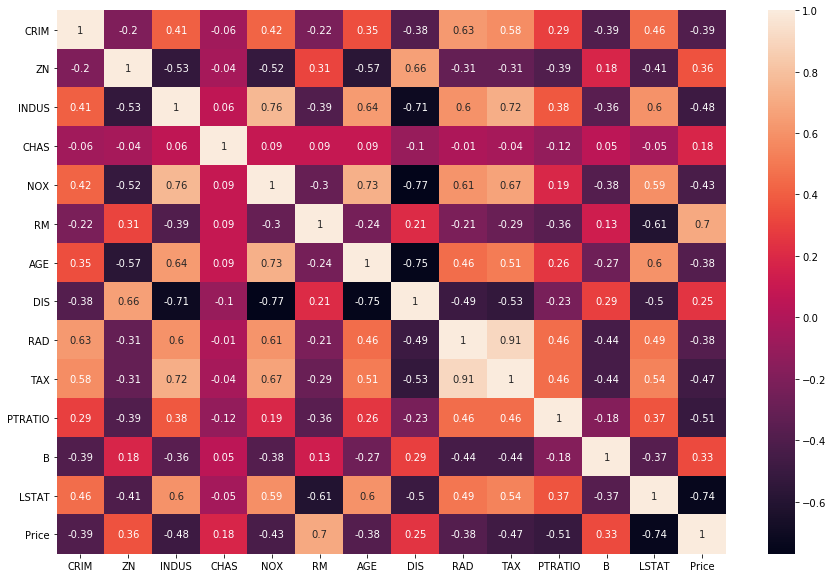

## 상관 관계가 매우 높은 중복 독립 변수 제거
* 'RAD'와 'TAX'간의 상관관계가 0.91로 매우 높기 때문에 독립적으로 보기 어렵다
* 두 변수 중에 'Price'와 상관 관계가 상대적으로 낮은 'RAD'를 제거한다.

## 표준화
* `StandardScaler()`로 표준화를 한다.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,Price
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-1.106115,0.113032,0.441052,-1.026501,1.487503


## 각 변수들 간의 산점도 매트릭스 그리기
* `sns.pairplot()`을 이용해서 산점도 매트릭스 그리기

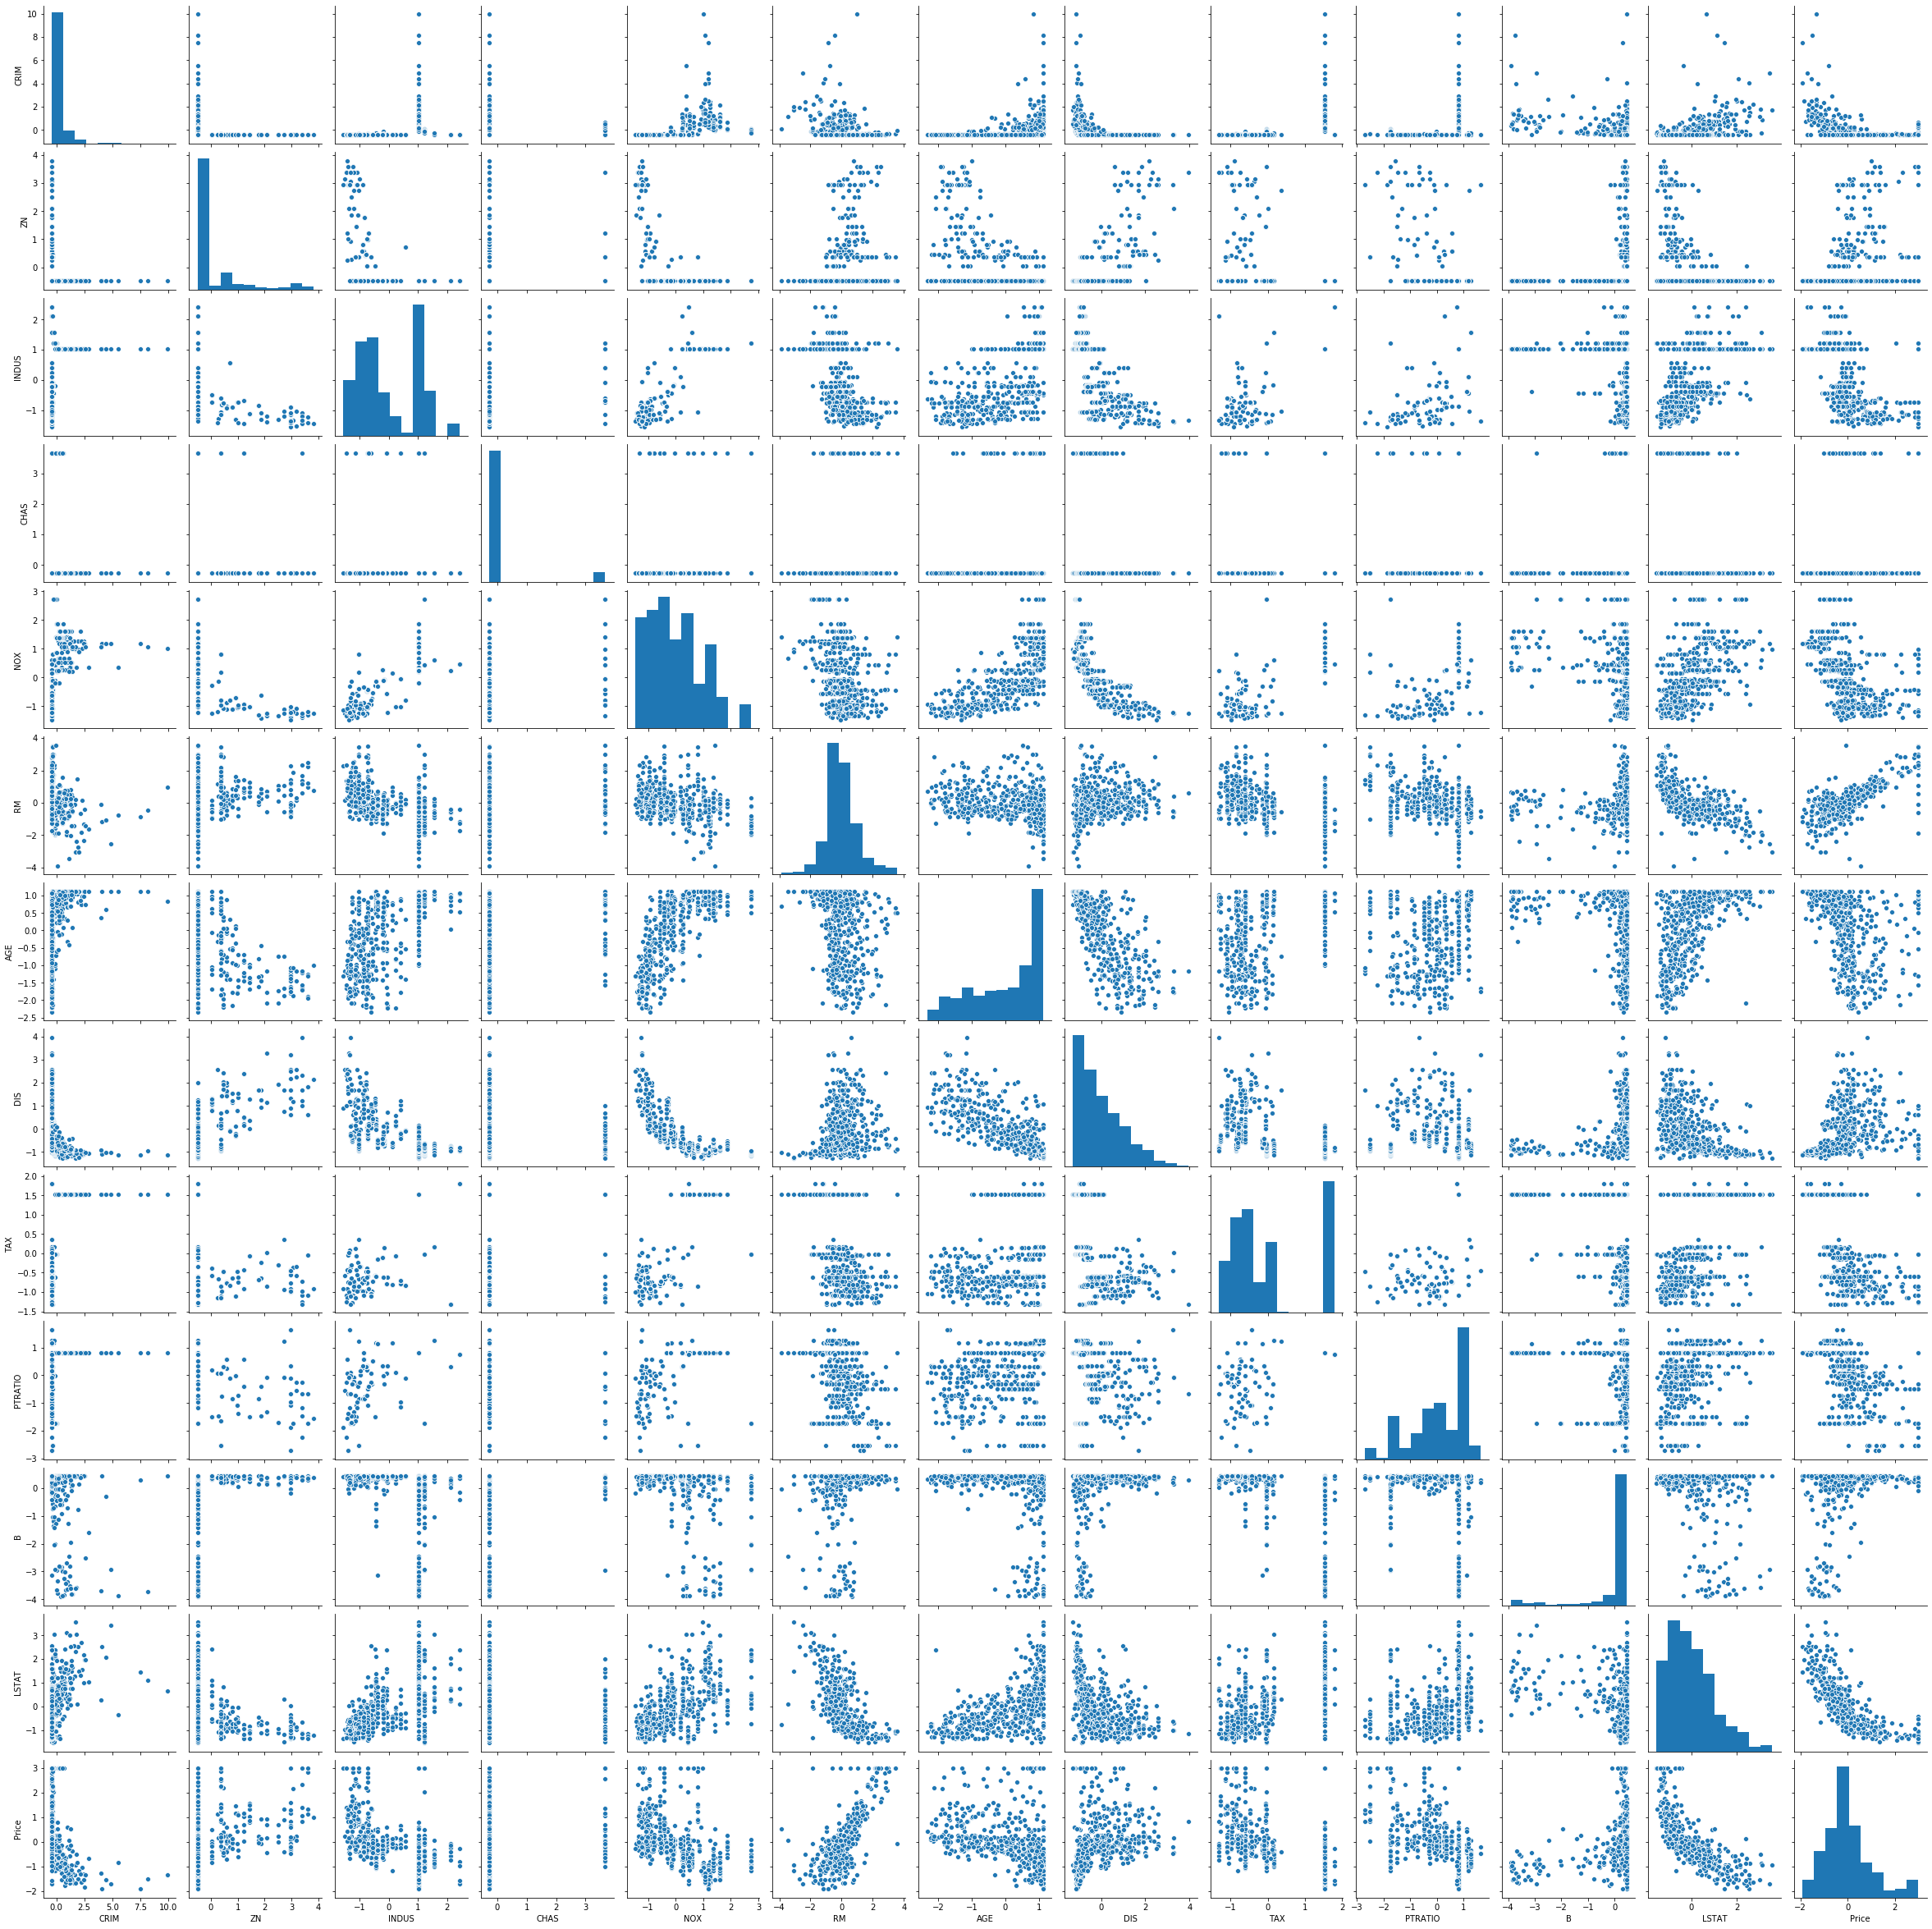

## 다항 변환
* 1차식으로 표현할 수 없는 변수 확인
* 'Price' 컬럼 제거
* `PolynomialFeatures()`로 다항식 변환

In [59]:
from sklearn.preprocessing import PolynomialFeatures



(506, 90) (506,)


In [61]:
df_X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-1.106115,0.113032,0.441052,-1.026501


## 훈련 및 테스트 데이타 분할

In [62]:
from sklearn.model_selection import train_test_split



## alpha 값을 0~100으로 변경하면서 Ridge 모델 학습 및 평가
* 평가 지표
    * R2, MSE, RMSE, MAE

In [134]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error



,alpha,R2,MSE,RMSE,MAE


alpha:0.000, R2:0.806, MSE:17.775, RMSE:4.216, MAE:2.637
alpha:1.000, R2:0.831, MSE:15.493, RMSE:3.936, MAE:2.529
alpha:2.000, R2:0.848, MSE:13.937, RMSE:3.733, MAE:2.496
alpha:3.000, R2:0.859, MSE:12.941, RMSE:3.597, MAE:2.476
alpha:4.000, R2:0.866, MSE:12.237, RMSE:3.498, MAE:2.459
alpha:5.000, R2:0.872, MSE:11.706, RMSE:3.421, MAE:2.443
alpha:6.000, R2:0.877, MSE:11.289, RMSE:3.360, MAE:2.429
alpha:7.000, R2:0.881, MSE:10.951, RMSE:3.309, MAE:2.417
alpha:8.000, R2:0.884, MSE:10.671, RMSE:3.267, MAE:2.406
alpha:9.000, R2:0.886, MSE:10.434, RMSE:3.230, MAE:2.396
alpha:10.000, R2:0.888, MSE:10.232, RMSE:3.199, MAE:2.386
alpha:11.000, R2:0.890, MSE:10.057, RMSE:3.171, MAE:2.378
alpha:12.000, R2:0.892, MSE:9.905, RMSE:3.147, MAE:2.370
alpha:13.000, R2:0.893, MSE:9.771, RMSE:3.126, MAE:2.363
alpha:14.000, R2:0.895, MSE:9.652, RMSE:3.107, MAE:2.358
alpha:15.000, R2:0.896, MSE:9.547, RMSE:3.090, MAE:2.352
alpha:16.000, R2:0.897, MSE:9.453, RMSE:3.075, MAE:2.347
alpha:17.000, R2:0.898, MSE:9

## 평가 지표 시각화

Text(0.5, 1.0, 'RAE')

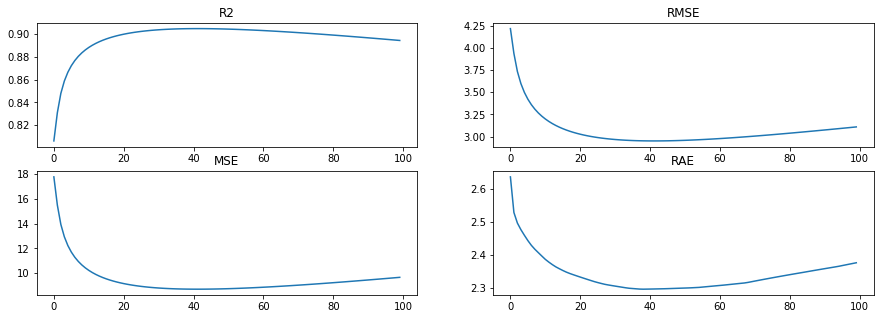

## 가장 좋은 평가 결과의 alpha 값 출력
* R2가 가장 높으면서, MSE, MAE가 가장 작은 alpha 값을 출력

,alpha,R2,MSE,RMSE,MAE
41,41.0,0.904928,8.713787,2.951912,2.295894
